In [11]:
import pandas as pd
import numpy as np

anomaly_data = pd.read_csv(
    "../data/для анализа/dataset._anomaly.csv", delimiter=";")
normal_data = pd.read_csv(
    "../data/для анализа/dataset._normal.csv", delimiter=";")
problem_data = pd.read_csv(
    "../data/для анализа/dataset._problems.csv", delimiter=";")

/var/folders/5q/07dc8q6x3j507dkxbtmm2_2r0000gn/T/ipykernel_99320/4009970002.py:6: DtypeWarning: Columns (3,12,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,37,41,42,44) have mixed types. Specify dtype option on import or set low_memory=False.
  normal_data = pd.read_csv(
/var/folders/5q/07dc8q6x3j507dkxbtmm2_2r0000gn/T/ipykernel_99320/4009970002.py:8: DtypeWarning: Columns (3,11,12,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,37,41,42,44) have mixed types. Specify dtype option on import or set low_memory=False.
  problem_data = pd.read_csv(


In [12]:
# Удаление ненужных столбцов
anomaly_data.drop(columns=["iButton2"], inplace=True)
normal_data.drop(columns=["iButton2"], inplace=True)
problem_data.drop(columns=["iButton2"], inplace=True)

anomaly_data.replace('-', np.nan, inplace=True)
normal_data.replace('-', np.nan, inplace=True)
problem_data.replace('-', np.nan, inplace=True)

In [13]:
def convert_to_numeric_date(df):
    df['Дата и время'] = pd.to_numeric(
        df['Дата и время'], errors='coerce')  # Convert to numeric format
    # Update state mapping if necessary
    state_mapping = {"Отпущ.": 0, "Впущ.": 1, "Другое_состояние": 2}
    df['Сост.пед.сцепл.'] = df['Сост.пед.сцепл.'].replace(state_mapping)

    columns_to_drop = []
    for column in df.columns:
        mode_values = df[column].mode()
        if len(mode_values) == 0:
            columns_to_drop.append(column)
        else:
            most_common_value = mode_values[0]
            if most_common_value == '        -':
                columns_to_drop.append(column)
            else:
                df[column].fillna(most_common_value, inplace=True)

    # Drop columns with all values equal to "-"
    df.drop(columns=columns_to_drop, inplace=True)

    return df


# Применение функции к каждому DataFrame
anomaly_data = convert_to_numeric_date(anomaly_data)
normal_data = convert_to_numeric_date(normal_data)
problem_data = convert_to_numeric_date(problem_data)

In [14]:
anomaly_data.head()

,"Полож.пед.акселер.,%","Давл.масла двиг.,кПа","Темп.масла двиг.,°С","Обор.двиг.,об/мин",КПП. Температура масла,КПП. Давление масла в системе смазки,Скорость,ДВС. Давление смазки,ДВС. Температура охлаждающей жидкости,"Давление в пневмостистеме (spn46), кПа",...,Аварийная температура масла ДВС(spn3856),Неисправность тормозной системы (spn3863),Термостарт (spn3862),Разрешение запуска двигателя (spn3861),Низкий уровень ОЖ (spn3860),Аварийная температура масла ГТР (spn3867),Необходимость сервисного обслуживания (spn3866),Подогрев топливного фильтра (spn3865),Вода в топливе (spn3864),Холодный старт (spn3871)
0,"7,0",488,59,"656,000",-247,675,24,165,115,59,...,0,0,0,0,0,0,0,0,0,0
1,"54,0",1171,77,"2424,000",-9,1809,20,104,34,851,...,0,0,0,0,0,0,0,0,0,0
2,"6,0",721,168,"1151,000",-127,2445,12,557,127,402,...,0,0,0,0,0,0,0,0,0,0
3,"91,0",779,75,"2324,000",-178,2206,35,1126,13,822,...,0,0,0,0,0,0,0,0,0,0
4,"59,0",718,181,"4658,000",-53,960,5,1248,16,622,...,0,0,0,0,0,0,0,0,0,0


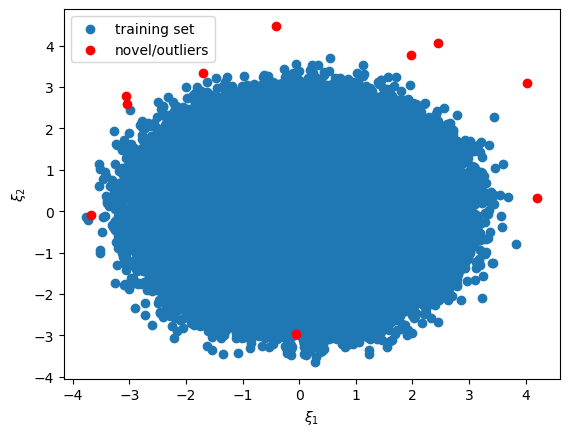

In [38]:
# Visualization of outliers
from matplotlib import pyplot as plt
import numpy as np
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
# Replace commas with periods and convert to numeric
anomaly_data_numeric = anomaly_data.replace(',', '.', regex=True).astype(float)

# Impute missing values with mean
imputer = SimpleImputer(strategy='mean')
numeric_cols_imputed = imputer.fit_transform(anomaly_data_numeric)

# Corrected Pipeline definition
pipe = Pipeline([('scaler', StandardScaler()),
                ('dim_red', PCA(n_components=2))])

Xt = pipe.fit_transform(numeric_cols_imputed)
# generate novel/outlier points
np.random.seed(1)
theta = 2*np.pi*np.random.random(10)
X_test = np.vstack((4*np.cos(theta) + np.random.random(10),
                   4*np.sin(theta) + np.random.random(10)))
plt.scatter(*Xt.T)
plt.scatter(*X_test, c='red')
plt.xlabel('$\\xi_1$')
plt.ylabel('$\\xi_2$')
plt.legend(["training set", "novel/outliers"])
plt.show()

In [16]:
normal_data.tail()

,"Темп.масла двиг.,°С",Сост.пед.сцепл.,КПП. Температура масла,КПП. Давление масла в системе смазки,Скорость,ДВС. Давление смазки,ДВС. Температура охлаждающей жидкости,"Давление в пневмостистеме (spn46), кПа",Уровень топлива % (spn96),Электросистема. Напряжение,...,Аварийная температура масла ДВС(spn3856),Неисправность тормозной системы (spn3863),Термостарт (spn3862),Разрешение запуска двигателя (spn3861),Низкий уровень ОЖ (spn3860),Аварийная температура масла ГТР (spn3867),Необходимость сервисного обслуживания (spn3866),Подогрев топливного фильтра (spn3865),Вода в топливе (spn3864),Холодный старт (spn3871)
892878,-,-,-273,1200,0,140,81,816,94.80000000000001,28,...,0,0,0,0,0,0,0,0,0,0
892879,-,-,-273,1200,0,140,81,816,94.80000000000001,28,...,0,0,0,0,0,0,0,0,0,0
892880,-,-,-273,1200,0,140,81,816,94.80000000000001,28,...,0,0,0,0,0,0,0,0,0,0
892881,-,-,-273,1200,0,140,81,816,94.80000000000001,28,...,0,0,0,0,0,0,0,0,0,0
892882,-,-,-273,1200,0,140,81,816,94.80000000000001,28,...,0,0,0,0,0,0,0,0,0,0


In [17]:
# Преобразование всех строковых столбцов в числовые значения
for column in anomaly_data.columns:
    if anomaly_data[column].dtype == 'object':
        anomaly_data[column] = anomaly_data[column].str.replace(
            ',', '.').astype(float)

In [18]:
anomaly_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 189704 entries, 0 to 189703
Data columns (total 41 columns):
 #   Column                                                       Non-Null Count   Dtype  
---  ------                                                       --------------   -----  
 0   Полож.пед.акселер.,%                                         189704 non-null  float64
 1   Давл.масла двиг.,кПа                                         189704 non-null  int64  
 2   Темп.масла двиг.,°С                                          189704 non-null  int64  
 3   Обор.двиг.,об/мин                                            189704 non-null  float64
 4   КПП. Температура масла                                       189704 non-null  int64  
 5   КПП. Давление масла в системе смазки                         189704 non-null  int64  
 6   Скорость                                                     189704 non-null  int64  
 7   ДВС. Давление смазки                                         1897

In [19]:
# from sklearn.ensemble import IsolationForest
# import pickle

# # Create and train the Isolation Forest model
# isolation_forest = IsolationForest(contamination=0.05, random_state=42)
# isolation_forest.fit(anomaly_data)

# # Specify the file path where you want to save the pickle file
# file_path = 'model.pkl'

# # Save the model to a pickle file
# with open(file_path, 'wb') as f:
#     pickle.dump(isolation_forest, f)

# print("Model saved successfully as model.pkl.")

In [35]:
import pickle

# Load the saved Isolation Forest model from the pickle file
file_path = '../anomaly_detection/model.pkl'
with open(file_path, 'rb') as f:
    loaded_model = pickle.load(f)

# Assuming 'new_data' is the new data you want to make predictions on
# Replace 'new_data' with your actual new data
new_data = anomaly_data

# Make predictions using the loaded model
anomaly_predictions = loaded_model.predict(new_data)

# 'anomaly_predictions' will contain the predictions (1 for inliers, -1 for outliers/anomalies)
# You can use these predictions according to your application needs

In [32]:
# # Визуализация аномальных точек пример
# plt.scatter(anomaly_data['Полож.пед.акселер.,%'], anomaly_data['Давл.масла двиг.,кПа'], c=np.where(
#     anomaly_predictions == -1, 'red', 'blue'))
# plt.xlabel('Полож.пед.акселер.,%')
# plt.ylabel('Давл.масла двиг.,кПа')
# plt.title('Isolation Forest Anomaly Detection')
# plt.show()

In [41]:
count = 0
df = pd.read_csv(
    "../data/для анализа/dataset._anomaly.csv", delimiter=";")
for i, prediction in enumerate(anomaly_predictions):
    time = df.iloc[i, 0]
    if prediction == -1:
        print(f"Time {time}: Anomaly")
        count += 1
    else:
        continue
print(count)

Time 19/05/2023 00:03:10: Anomaly
Time 19/05/2023 00:06:05: Anomaly
Time 19/05/2023 00:06:27: Anomaly
Time 19/05/2023 00:08:33: Anomaly
Time 19/05/2023 00:10:44: Anomaly
Time 19/05/2023 00:17:07: Anomaly
Time 19/05/2023 00:20:06: Anomaly
Time 19/05/2023 00:26:36: Anomaly
Time 19/05/2023 00:27:39: Anomaly
Time 19/05/2023 00:41:09: Anomaly
Time 19/05/2023 00:53:06: Anomaly
Time 19/05/2023 00:55:36: Anomaly
Time 19/05/2023 01:07:39: Anomaly
Time 19/05/2023 01:19:09: Anomaly
Time 19/05/2023 01:21:39: Anomaly
Time 19/05/2023 01:23:39: Anomaly
Time 19/05/2023 01:31:09: Anomaly
Time 19/05/2023 01:35:09: Anomaly
Time 19/05/2023 01:52:09: Anomaly
Time 19/05/2023 02:00:37: Anomaly
Time 19/05/2023 02:03:34: Anomaly
Time 19/05/2023 02:41:39: Anomaly
Time 19/05/2023 02:52:39: Anomaly
Time 19/05/2023 03:22:09: Anomaly
Time 19/05/2023 03:32:09: Anomaly
Time 19/05/2023 03:33:09: Anomaly
Time 19/05/2023 03:37:48: Anomaly
Time 19/05/2023 03:43:09: Anomaly
Time 19/05/2023 03:48:40: Anomaly
Time 19/05/202

Number of anomalies detected: 9486


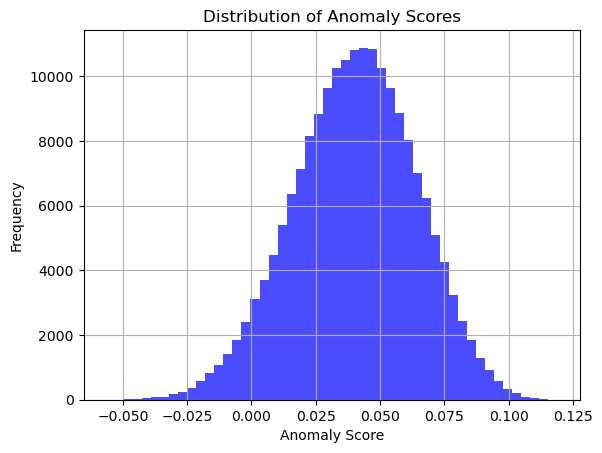

In [37]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming 'anomaly_predictions' is the array of predictions (-1 for anomalies, 1 for normal data)
# Replace it with your actual anomaly predictions
anomaly_scores = loaded_model.decision_function(new_data)

# Count the number of anomalies detected
anomaly_count = np.sum(anomaly_predictions == -1)
print(f"Number of anomalies detected: {anomaly_count}")

# Plot the distribution of anomaly scores
plt.hist(anomaly_scores, bins=50, color='blue', alpha=0.7)
plt.xlabel('Anomaly Score')
plt.ylabel('Frequency')
plt.title('Distribution of Anomaly Scores')
plt.grid(True)
plt.show()